In [175]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML

from midas.rectgrid import wright_eos

### Regional Weddell Sea Ice Shelf Thermodynamic Coupling Test

    The goals for this configuration are to more fully exercise the MOM6/MOM6_Ice_Shelf 
    code using realistic bathymetry and ice shelf cavity geometry.

In [352]:
#ds=xr.open_dataset('FR_zstar/rest01.no_shelf/19920101.ocean_daily.nc')
#ds=xr.open_dataset('FR_zstar/rest01/19920101.ocean_daily.nc')
ds=xr.open_dataset('FR_zstar/rest01.restart/19920101.ocean_daily.nc')


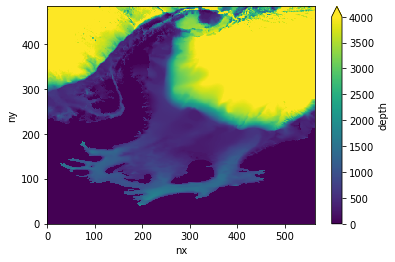

In [353]:
## Bathymetry incuding Ice Shelf Cavities
dst=xr.open_dataset('topog_FR.nc')
dst['depth'].plot(vmin=0,vmax=4000)

In [354]:
#Horizontal grid metrics
hgrid=xr.open_dataset('ocean_hgrid.nc')
dxT=hgrid['dx'][1::2,0::2].data + hgrid['dx'][1::2,1::2].data
dyT=hgrid['dy'][0::2,1::2].data + hgrid['dy'][1::2,1::2].data
ds=ds.assign(depth=dst['depth'])
ds=ds.assign(wet=lambda ds:ds.depth>0)
xh=ds['xh'].data;yq=ds['yq'].data;yh=ds['yh'].data
dt_thick=xr.open_dataset('thick.nc')
ds=ds.assign(thick=dt_thick['thick'])

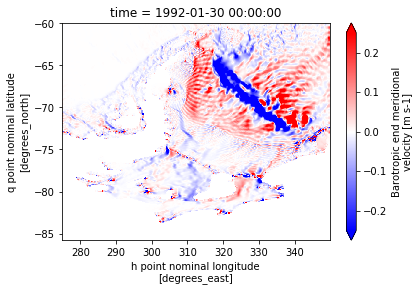

In [363]:
#Grab a time slice of the y-direction Barotropic Velocity
ds['vbt'].isel(time=slice(-2,-1)).plot(vmin=-.25,vmax=.25,cmap=plt.cm.bwr)

In [364]:
vbt=ds['vbt'].isel(time=slice(-2,-1)).data
vbt=np.squeeze(vbt)
vbt[np.isnan(vbt)]=0.0
dpth=ds['depth'].data
dpth_v=0.5*(dpth+np.roll(dpth,shift=-1,axis=0))
vhbt=vbt[1:,:]*dpth_v*dxT
psi_v=np.cumsum(vhbt,axis=1)/1.e6
psi_v=np.ma.masked_where(ds['wet']==0,psi_v)

-393.80353007936804 175.0692852234104


Text(0.5, 1.0, 'Day 30 Approx. Barotropic StreamFunction (Sv) FR_zstar')

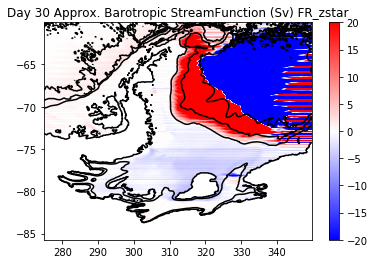

In [365]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
X,Y=np.meshgrid(xh,yh)
cf = ax.pcolormesh(X,Y,np.squeeze(psi_v),vmin=-20,vmax=20,cmap=plt.cm.bwr)
#cf=ax.contourf(X,Y,np.squeeze(psi_v),np.arange(-10,11,1),cmap=plt.cm.bwr)
plt.colorbar(cf)
X,Y=np.meshgrid(xh,yh)
print(psi_v.min(),psi_v.max())
#plt.contour(X,Y,np.squeeze(psi_v),np.arange(-10,0,1),colors='b')
#cs=ax.contour(X,Y,np.squeeze(psi_v),np.arange(1,10,1),colors='r')
plt.contour(X,Y,dpth,[0,1000,3000,4000,5000],colors='k')
#plt.colorbar(cf)
plt.title('Day 30 Approx. Barotropic StreamFunction (Sv) FR_zstar')

Text(0.5, 1.0, 'Day 30 Ocean Surface Temperature (degC) FR_zstar')

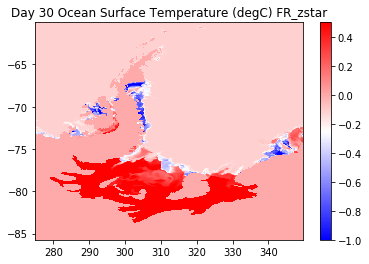

In [358]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
X,Y=np.meshgrid(xh,yh)
sst=ds['sst'].isel(time=slice(0,1)).data
sst=np.squeeze(sst)
sst[np.isnan(sst)]=0.0
cf = ax.pcolormesh(X,Y,np.squeeze(sst),vmin=-1,vmax=0.5,cmap=plt.cm.bwr)
plt.colorbar(cf)
plt.title('Day 30 Ocean Surface Temperature (degC) FR_zstar')

Text(0.5, 1.0, 'SSH Along Northern Boundary')

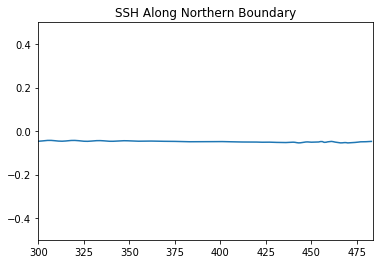

In [359]:
e=ds['e'].isel(zi=slice(0,1)).data
e[np.isnan(e)]=0.0
plt.plot(np.squeeze(e[0,0,:,-1]))
plt.xlim(300,484)
plt.ylim(-.5,.5)
plt.title('SSH Along Northern Boundary')

Text(0.5, 1.0, 'Initial Temperature Section Along 315W')

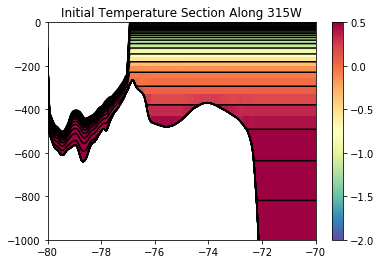

In [348]:
ds_ic=xr.open_dataset('FR_zstar/rest01/MOM_IC.nc')
temp=ds_ic['Temp'].sel(lonh=slice(314.95,315.05)).data
salt=ds_ic['Salt'].sel(lonh=slice(314.95,315.05)).data
sigma2=wright_eos(temp,salt,2.e7)
e=ds_ic['eta'].sel(lonh=slice(314.95,315.05)).data
e[np.isnan(e)]=0.
e=np.squeeze(e)
eq=0.5*(e+np.roll(e,shift=-1,axis=1))
e0=eq[:,0][:,np.newaxis]
eq=np.concatenate((eq,e0),axis=1)
xplt=ds['yq'].data
ydum=np.zeros(e.shape[0])
X,Ydum=np.meshgrid(xplt,ydum)
#print(X.shape,e.shape,temp.shape)
#print(e.min(),e.max())
plt.pcolormesh(X,eq,np.squeeze(temp),vmin=-2,vmax=0.5,cmap=plt.cm.Spectral_r)
for k in np.arange(0,eq.shape[0],2):
    ek=eq[k,:];plt.plot(xplt,ek,color='k')
#plt.pcolormesh(X,eq,np.squeeze(salt),vmin=34,vmax=34.75)
#plt.pcolormesh(X,eq,np.squeeze(sigma2-1000.),vmin=36.5,vmax=37.15)
plt.colorbar()
plt.xlim(-80,-70)
plt.ylim(-1000,0)
plt.title('Initial Temperature Section Along 315W')

Text(0.5, 1.0, 'Temperature Section Along 315W')

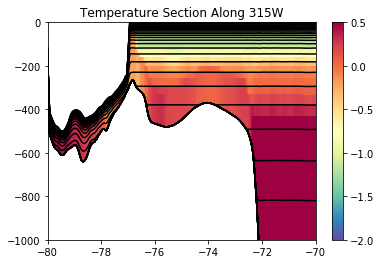

In [360]:
temp=ds['temp'].isel(time=slice(-2,-1)).sel(xh=slice(314.95,315.05)).data
salt=ds['salt'].isel(time=slice(-2,-1)).sel(xh=slice(314.95,315.05)).data
sigma2=wright_eos(temp,salt,2.e7)
e=ds['e'].isel(time=slice(-2,-1)).sel(xh=slice(314.95,315.05)).data
e[np.isnan(e)]=0.
e=np.squeeze(e)
eq=0.5*(e+np.roll(e,shift=-1,axis=1))
e0=eq[:,0][:,np.newaxis]
eq=np.concatenate((eq,e0),axis=1)
xplt=ds['yq'].data
ydum=np.zeros(e.shape[0])
X,Ydum=np.meshgrid(xplt,ydum)
#print(X.shape,e.shape,temp.shape)
#print(e.min(),e.max())
plt.pcolormesh(X,eq,np.squeeze(temp),vmin=-2,vmax=0.5,cmap=plt.cm.Spectral_r)
for k in np.arange(0,eq.shape[0],2):
    ek=eq[k,:];plt.plot(xplt,ek,color='k')
#plt.pcolormesh(X,eq,np.squeeze(salt),vmin=34,vmax=34.75)
#plt.pcolormesh(X,eq,np.squeeze(sigma2-1000.),vmin=36.5,vmax=37.15)
plt.colorbar()
plt.xlim(-80,-70)
plt.ylim(-1000,0)
plt.title('Temperature Section Along 315W')

(1, 484, 1)


Text(0.5, 1.0, 'Barotropic Zonal Velocity along 315W')

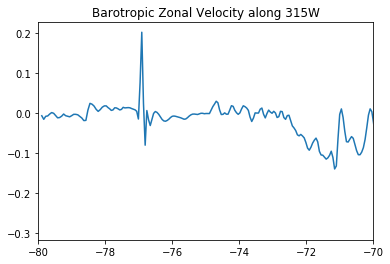

In [361]:
ubt=ds['ubt'].isel(time=slice(-2,-1)).sel(xq=slice(314.95,315.05)).data
print(ubt.shape)
plt.plot(yh,np.squeeze(ubt))
plt.xlim(-80,-70)
plt.title('Barotropic Zonal Velocity along 315W')

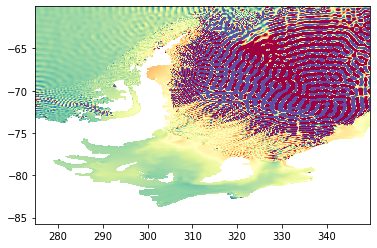

In [362]:
#eta_diff = np.squeeze(ds['e'].isel(zi=slice(0,1),time=slice(-2,-1)).data)-np.squeeze(ds_ic['eta'].isel(Interface=slice(0,1)).data)
eta_diff=np.squeeze(ds['e'].isel(zi=slice(0,1),time=slice(-2,-1)).data)-np.squeeze(ds['e'].isel(zi=slice(0,1),time=slice(0,1)).data)
xplt=ds['xh'].data
yplt=ds['yh'].data
X,Y=np.meshgrid(xplt,yplt)

plt.pcolormesh(X,Y,eta_diff,vmin=-.2,vmax=.2,cmap=plt.cm.Spectral_r)
plt.pcolormesh(X,Y,eta_diff,vmin=-.2,vmax=.2,cmap=plt.cm.Spectral_r)

#plt.xlim(290,310)
#plt.ylim(-70,-65)

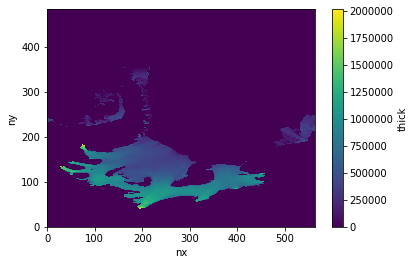

In [299]:
ds['thick'].plot()

In [68]:
# initialization function: plot the background of each frame
def init():
    cf = ax.pcolormesh(X,Y,np.squeeze(vbt),vmin=-1,vmax=1,cmap=plt.cm.bwr)
    #plt.colorbar(cf)
    return (cf,)

In [69]:
# animation function. This is called sequentially
def animate(i):
    vbt=ds['vbt'].isel(time=slice(i,i+1)).data
    cf = ax.pcolormesh(X,Y,np.squeeze(vbt),vmin=-1,vmax=1,cmap=plt.cm.bwr)
    #plt.colorbar(cf)
    return (cf,)


In [70]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10, interval=20, blit=True)


In [185]:
#HTML(anim.to_html5_video())